In [1]:
import cv2 as cv 
import matplotlib.pyplot as plt 
import pandas as pd

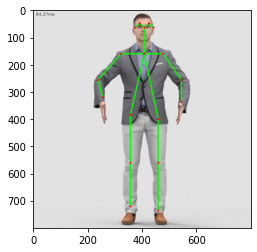

In [5]:
img= cv.imread(r'\Users\Alberto\OneDrive\Documents\Big Data\pirple\human-pose-estimation-opencv-master\human-pose-estimation-opencv-master\image.jpg')

def pose_estimation(frame):

    ruta=r'\Users\Alberto\OneDrive\Documents\Big Data\pirple\human-pose-estimation-opencv-master\human-pose-estimation-opencv-master\graph_opt.pb'
    net=cv.dnn.readNetFromTensorflow(ruta)
    
    inWidth=370
    inHeight=400
    thr=0.2
    frameWidth= frame.shape[1]
    frameHeight= frame.shape[0]
    net.setInput(cv.dnn.blobFromImage(frame,1.0,(inWidth,inHeight),(127.5, 127.5, 127.5),swapRB=True, crop=False))
    out=net.forward()
    out=out[:,:19,:,:]

    BODY_PARTS = { "Nose": 0, "Neck": 1, "RShoulder": 2, "RElbow": 3, "RWrist": 4,
               "LShoulder": 5, "LElbow": 6, "LWrist": 7, "RHip": 8, "RKnee": 9,
               "RAnkle": 10, "LHip": 11, "LKnee": 12, "LAnkle": 13, "REye": 14,
               "LEye": 15, "REar": 16, "LEar": 17, "Background": 18 }

    POSE_PAIRS = [ ["Neck", "RShoulder"], ["Neck", "LShoulder"], ["RShoulder", "RElbow"],
               ["RElbow", "RWrist"], ["LShoulder", "LElbow"], ["LElbow", "LWrist"],
               ["Neck", "RHip"], ["RHip", "RKnee"], ["RKnee", "RAnkle"], ["Neck", "LHip"],
               ["LHip", "LKnee"], ["LKnee", "LAnkle"], ["Neck", "Nose"], ["Nose", "REye"],
               ["REye", "REar"], ["Nose", "LEye"], ["LEye", "LEar"] ]

    points = []
    for i in range(len(BODY_PARTS)):
        # Slice heatmap of corresponging body's part.
        heatMap = out[0, i, :, :]

        # Originally, we try to find all the local maximums. To simplify a sample
        # we just find a global one. However only a single pose at the same time
        # could be detected this way.
        _, conf, _, point = cv.minMaxLoc(heatMap)
        x = (frameWidth * point[0]) / out.shape[3]
        y = (frameHeight * point[1]) / out.shape[2]
        # Add a point if it's confidence is higher than threshold.
        points.append((int(x), int(y)) if conf > thr else None)

    
    for pair in POSE_PAIRS:
        partFrom = pair[0]
        partTo = pair[1]
        assert(partFrom in BODY_PARTS)
        assert(partTo in BODY_PARTS)

        idFrom = BODY_PARTS[partFrom]
        idTo = BODY_PARTS[partTo]

        if points[idFrom] and points[idTo]:
            cv.line(frame, points[idFrom], points[idTo], (0, 360, 0), 3)
            cv.ellipse(frame, points[idFrom], (3, 3), 0, 0, 360, (0, 0, 255), cv.FILLED)
            cv.ellipse(frame, points[idTo], (3, 3), 0, 0, 360, (0, 0, 255), cv.FILLED)

    t, _ = net.getPerfProfile()
    freq = cv.getTickFrequency() / 1000
    cv.putText(frame, '%.2fms' % (t / freq), (10, 20), cv.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0))

    return frame

def pose_plot():
    estimated_image=pose_estimation(img)
    imgplot=plt.imshow(cv.cvtColor(estimated_image, cv.COLOR_BGR2RGB))
    return imgplot

pose_plot()

In [2]:
def pose_video():
    inWidth=370
    inHeight=400
    thr=0.2
    BODY_PARTS = { "Nose": 0, "Neck": 1, "RShoulder": 2, "RElbow": 3, "RWrist": 4,
               "LShoulder": 5, "LElbow": 6, "LWrist": 7, "RHip": 8, "RKnee": 9,
               "RAnkle": 10, "LHip": 11, "LKnee": 12, "LAnkle": 13, "REye": 14,
               "LEye": 15, "REar": 16, "LEar": 17, "Background": 18 }

    POSE_PAIRS = [ ["Neck", "RShoulder"], ["Neck", "LShoulder"], ["RShoulder", "RElbow"],
               ["RElbow", "RWrist"], ["LShoulder", "LElbow"], ["LElbow", "LWrist"],
               ["Neck", "RHip"], ["RHip", "RKnee"], ["RKnee", "RAnkle"], ["Neck", "LHip"],
               ["LHip", "LKnee"], ["LKnee", "LAnkle"], ["Neck", "Nose"], ["Nose", "REye"],
               ["REye", "REar"], ["Nose", "LEye"], ["LEye", "LEar"] ]

    ruta=r'\Users\Alberto\OneDrive\Documents\Big Data\pirple\human-pose-estimation-opencv-master\human-pose-estimation-opencv-master\graph_opt.pb'
    outfile_path=r'\Users\Alberto\OneDrive\Documents\Big Data\pirple\human-pose-estimation-opencv-master\human-pose-estimation-opencv-master\datapoints.csv'

    net=cv.dnn.readNetFromTensorflow(ruta)

    cap=cv.VideoCapture(r'\Users\Alberto\OneDrive\Documents\Big Data\pirple\human-pose-estimation-opencv-master\human-pose-estimation-opencv-master\nadal.mp4')
    
    cap.set(3,800)
    cap.set(4,800)

    if not cap.isOpened():
        cap=cv.VideoCapture(0)
    if not cap.isOpened():
        raise IOError('Cannot open video')
    
    
    while cv.waitKey(1)<0:
        hasFrame,frame= cap.read()

        if not hasFrame:
            cv.waitKey()
            break
        #get the image shape
        frameWidth, frameHeight= frame.shape[1], frame.shape[0]

        #get a blob from the image
        inputblob=cv.dnn.blobFromImage(frame,1.0,(inWidth,inHeight),(127.5, 127.5, 127.5),swapRB=True, crop=False)

        #set the input and perform a forward pass
        net.setInput(inputblob)
        out=net.forward()

        out=out[:,:19,:,:]

        points = []
        for i in range(len(BODY_PARTS)):
        # Slice heatmap of corresponging body's part.
            heatMap = out[0, i, :, :]

        # Originally, we try to find all the local maximums. To simplify a sample
        # we just find a global one. However only a single pose at the same time
        # could be detected this way.
            _, conf, _, point = cv.minMaxLoc(heatMap)
            #scale the point to fit in the original image
            x = (frameWidth * point[0]) / out.shape[3]
            y = (frameHeight * point[1]) / out.shape[2]
        # Add a point if it's confidence is higher than threshold.
            points.append((int(x), int(y)) if conf > thr else None)
            

    
        for pair in POSE_PAIRS:
            partFrom = pair[0]
            partTo = pair[1]
            assert(partFrom in BODY_PARTS)
            assert(partTo in BODY_PARTS)

            idFrom = BODY_PARTS[partFrom]
            idTo = BODY_PARTS[partTo]

            if points[idFrom] and points[idTo]:
                cv.line(frame, points[idFrom], points[idTo], (0, 360, 0), 3)
                cv.ellipse(frame, points[idFrom], (3, 3), 0, 0, 360, (0, 0, 255), cv.FILLED)
                cv.ellipse(frame, points[idTo], (3, 3), 0, 0, 360, (0, 0, 255), cv.FILLED)
                
        
        t, _ = net.getPerfProfile()
        freq = cv.getTickFrequency() / 1000
        cv.putText(frame, '%.2fms' % (t / freq), (10, 20), cv.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0))
        cv.imshow('Pose estimation', frame)

        df=pd.DataFrame(points)
        df.to_csv(outfile_path,index=False)

        


In [3]:
pose_video()